Exercise 5.10: Racetrack (programming) Consider driving a race car around a turn like those shown in
Figure 5.5. You want to go as fast as possible, but not so fast as to run off the track. In our simplified
racetrack, the car is at one of a discrete set of grid positions, the cells in the diagram. The velocity is
also discrete, a number of grid cells moved horizontally and vertically per time step. The actions are
increments to the velocity components. Each may be changed by +1, −1, or 0 in each step, for a total
of nine (3 × 3) actions. Both velocity components are restricted to be nonnegative and less than 5,
and they cannot both be zero except at the starting line. Each episode begins in one of the randomly
selected start states with both velocity components zero and ends when the car crosses the finish line.
The rewards are −1 for each step until the car crosses the finish line. If the car hits the track boundary,
it is moved back to a random position on the starting line, both velocity components are reduced to
zero, and the episode continues. Before updating the car’s location at each time step, check to see if
the projected path of the car intersects the track boundary. If it intersects the finish line, the episode
ends; if it intersects anywhere else, the car is considered to have hit the track boundary and is sent
back to the starting line. To make the task more challenging, with probability 0.1 at each time step
the velocity increments are both zero, independently of the intended increments.

Apply a Monte Carlo control method to this task to compute the optimal policy from each starting state. Exhibit several
trajectories following the optimal policy (but turn the noise off for these trajectories).

In [1]:
%pip install numpy gymnasium

In [2]:
import numpy as np
import gymnasium as gym
from racetrack import Agent

In [3]:
env = gym.make('RaceTrackEnv-v0', track_file='tracks/problem_2.txt')
agent = Agent()

In [4]:
print(env.racetrack)

[[2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [7]:
pi, Q = agent.mc_egreedy(env, n=100000, eps=0.1)

iteration: 0
iteration: 10000
iteration: 20000
iteration: 30000
iteration: 40000
iteration: 50000
iteration: 60000
iteration: 70000
iteration: 80000
iteration: 90000
Finished


Value of 3 (yellow) represents the finish line. 2 (gold) represents start line. Grey represents the track and dark blue represents boundary.

[(0, 1500, 6), (-1, 1505, 5), (-1, 2256, 7), (-1, 3036, 3), (-1, 4560, 5), (-1, 6061, 5), (-1, 7587, 8), (-1, 9143, 1), (-1, 11463, 7), (-1, 13043, 8), (-1, 15374, 6), (-1, 18473, 0), (-1, 21542, 0), (-1, 23825)]


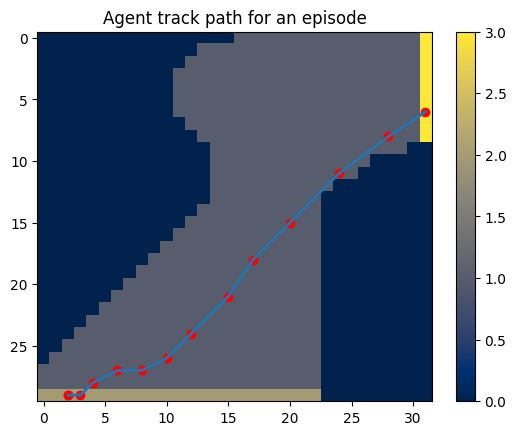

[(0, 12750, 8), (-1, 12756, 6), (-1, 13535, 7), (-1, 15040, 3), (-1, 0, 1), (-1, 1, 0), (-1, 26, 1), (-1, 51, 0), (-1, 16500, 8), (-1, 16506, 8), (-1, 6000, 3), (-1, 6001, 6), (-1, 6030, 2), (-1, 6776, 1), (-1, 6801, 8), (-1, 6832, 2), (-1, 7628, 7), (-1, 7708, 7), (-1, 8538, 4), (-1, 10113, 3), (-1, 11687, 6), (-1, 13241, 7), (-1, 15521, 0), (-1, 18540, 3), (-1, 20790, 8), (-1, 23046, 6), (-1, 3750, 7), (-1, 3755, 8), (-1, 4511, 7), (-1, 6041, 6), (-1, 8320, 0), (-1, 11315, 8), (-1, 13571, 4), (-1, 16596, 5), (-1, 14250, 2), (-1, 14251, 4), (-1, 14276, 8), (-1, 14307, 0), (-1, 15101, 1), (-1, 15126, 8), (-1, 15157, 2), (-1, 15953, 7), (-1, 16033, 0), (-1, 16852, 6), (-1, 16906, 1), (-1, 17676, 3), (-1, 17701, 0), (-1, 17726, 3), (-1, 17751, 1), (-1, 17776, 7), (-1, 17806, 0), (-1, 18576, 3), (-1, 18601, 1), (-1, 18626, 4), (-1, 18651, 1), (-1, 18676, 6), (-1, 18705, 3), (-1, 19455, 7), (-1, 20210, 6), (-1, 21715, 0), (-1, 23950)]


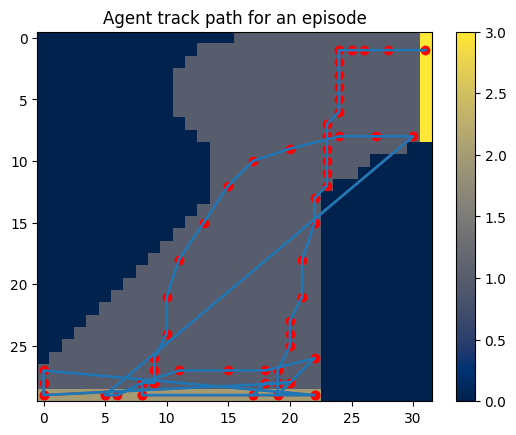

[(0, 13500, 3), (-1, 13501, 3), (-1, 13526, 4), (-1, 13551, 3), (-1, 13576, 2), (-1, 13602, 6), (-1, 13656, 3), (-1, 14430, 5), (-1, 15181, 2), (-1, 15952, 8), (-1, 16008, 8), (-1, 16839, 3), (-1, 12750, 8), (-1, 12756, 0), (-1, 13526, 8), (-1, 13557, 5), (-1, 14358, 7), (-1, 15188, 4), (-1, 16763, 5), (-1, 7500, 3), (-1, 7501, 0), (-1, 7526, 3), (-1, 7551, 0), (-1, 7576, 3), (-1, 7601, 4), (-1, 7626, 8), (-1, 7657, 0), (-1, 8451, 7), (-1, 8481, 2), (-1, 9252, 5), (-1, 9303, 6), (-1, 8250, 7), (-1, 8255, 8), (-1, 9011, 4), (-1, 10536, 5), (-1, 12062, 8), (-1, 13618, 3), (-1, 15942, 7), (-1, 750, 4), (-1, 751, 6), (-1, 780, 4), (-1, 1530, 7), (-1, 2285, 3), (-1, 3785, 1), (-1, 5280, 3), (-1, 6030, 0), (-1, 6776, 1), (-1, 6801, 5), (-1, 6827, 3), (-1, 6876, 0), (-1, 6901, 1), (-1, 6926, 6), (-1, 6955, 7), (-1, 7710, 0), (-1, 9205, 0), (-1, 9951, 5), (-1, 9977, 7), (-1, 10032, 8), (-1, 10838, 6), (-1, 12417, 8), (-1, 14723, 4), (-1, 17798, 3), (-1, 20872, 0), (-1, 23900)]


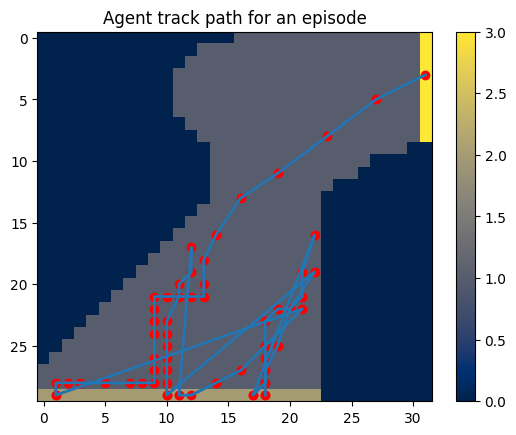

[(0, 12750, 8), (-1, 12756, 0), (-1, 13526, 2), (-1, 13552, 1), (-1, 13602, 6), (-1, 13656, 3), (-1, 14430, 5), (-1, 15181, 2), (-1, 15952, 8), (-1, 16008, 8), (-1, 16839, 3), (-1, 16500, 8), (-1, 16506, 8), (-1, 2250, 7), (-1, 2255, 8), (-1, 3011, 7), (-1, 4541, 4), (-1, 6816, 0), (-1, 9085, 1), (-1, 10580, 2), (-1, 11326, 5), (-1, 11352, 0), (-1, 11401, 7), (-1, 11431, 3), (-1, 12205, 3), (-1, 12955, 0), (-1, 13701, 4), (-1, 13726, 0), (-1, 13751, 1), (-1, 13776, 3), (-1, 13801, 3), (-1, 13826, 3), (-1, 13851, 2), (-1, 13877, 8), (-1, 13933, 2), (-1, 14754, 7), (-1, 14859, 0), (-1, 15703, 4), (-1, 2250, 7), (-1, 2255, 8), (-1, 3011, 7), (-1, 4541, 4), (-1, 6816, 0), (-1, 9085, 1), (-1, 10580, 2), (-1, 11326, 5), (-1, 11352, 0), (-1, 11401, 7), (-1, 11431, 3), (-1, 12205, 3), (-1, 12955, 5), (-1, 13706, 7), (-1, 14486, 2), (-1, 16007, 7), (-1, 16812, 2), (-1, 3000, 1), (-1, 3001, 1), (-1, 3026, 4), (-1, 3051, 1), (-1, 3076, 1), (-1, 3101, 1), (-1, 3126, 8), (-1, 3157, 8), (-1, 9000, 2

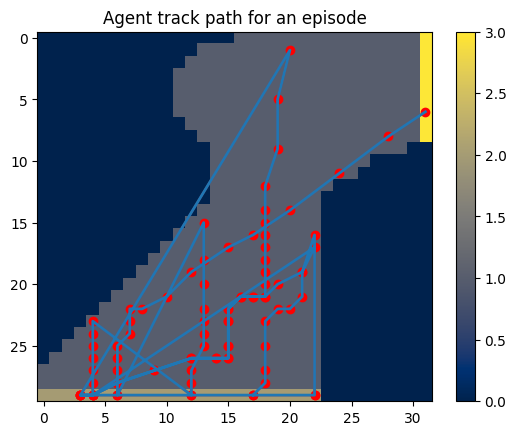

[(0, 9750, 5), (-1, 9751, 3), (-1, 9776, 4), (-1, 9801, 6), (-1, 9830, 6), (-1, 10585, 2), (-1, 12081, 6), (-1, 12860, 3), (-1, 14360, 1), (-1, 15855, 1), (-1, 16601, 6), (-1, 16630, 1), (-1, 2250, 7), (-1, 2255, 8), (-1, 3011, 7), (-1, 4541, 4), (-1, 6816, 0), (-1, 9085, 1), (-1, 10580, 2), (-1, 11326, 5), (-1, 11352, 0), (-1, 11401, 7), (-1, 11431, 1), (-1, 12201, 5), (-1, 12227, 1), (-1, 12277, 0), (-1, 12326, 6), (-1, 12355, 8), (-1, 13111, 0), (-1, 14630, 0), (-1, 15376, 8), (-1, 15407, 7), (-1, 16212, 6), (-1, 17766, 0), (-1, 20035, 6), (-1, 21540, 0), (-1, 23775)]


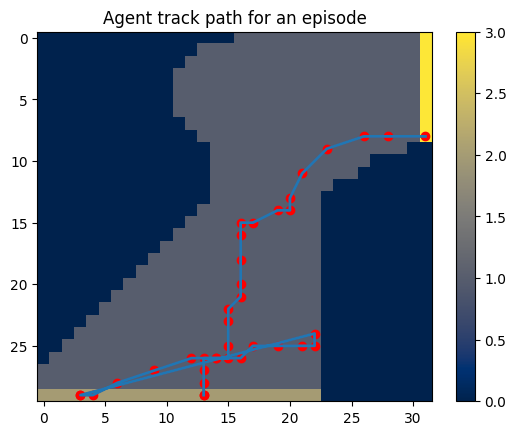

In [6]:
for i in range(5):
    agent.generate_episode(env, pi, render=True)